In [1]:
import platform
from bs4 import BeautifulSoup
import time
from selenium import webdriver
import json
from selenium.webdriver.support.wait import WebDriverWait
# from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from parser_glytoucan_utility import *
from json_utility import *
from glypy.io import glycoct,iupac
from glypy.algorithms.subtree_search import subtree_of

In [2]:
parsed_entry_list = load_json(r'/Users/apple/PycharmProjects/lectins_all_sugarbind.json')

In [3]:
len(parsed_entry_list)

738

In [4]:
parsed_entry_list[0]

{'agent': 'Escherichia coli N/S',
 'agent_add': '/agents/135',
 'gene': '',
 'ligand': {'G70323CJ': 'https://glytoucan.org/Structures/Glycans/G70323CJ'},
 'name': '17 kDa protein',
 'name_add': '/lectins/172'}

In [5]:
for i in parsed_entry_list:
    if i['agent']=='Influenzavirus A influenza A virus H9N2 subtype A/Hong Kong/2108/03':
        print(i)

{'agent': 'Influenzavirus A influenza A virus H9N2 subtype A/Hong Kong/2108/03', 'name_add': '/lectins/471', 'name': 'H9', 'agent_add': '/agents/338', 'gene': '', 'ligand': {'G80722US': 'https://glytoucan.org/Structures/Glycans/G80722US', 'G99745QX': 'https://glytoucan.org/Structures/Glycans/G99745QX', 'G00065MO': 'https://glytoucan.org/Structures/Glycans/G00065MO', 'G46776WR': 'https://glytoucan.org/Structures/Glycans/G46776WR', 'G09376MR': 'https://glytoucan.org/Structures/Glycans/G09376MR', 'G00054MO': 'https://glytoucan.org/Structures/Glycans/G00054MO'}}


In [6]:
agents_list = [i['agent'] for i in parsed_entry_list]

In [7]:
len(set(agents_list))

308

In [8]:
agents_set = set(agents_list)

In [9]:
agents_set

{'Actinobacillus pleuropneumoniae Serotype 1',
 'Actinobacillus pleuropneumoniae Serotype 2',
 'Actinomyces naeslundii ATCC 12104',
 'Actinomyces naeslundii N/S',
 'Actinomyces naeslundii WVU45',
 'Actinomyces spp.',
 'Actinomyces viscosus',
 'Actinomyces viscosus ATCC 19246',
 'Actinomyces viscosus N/S',
 'Adenovirus Human adenovirus D 19',
 'Adenovirus Human adenovirus D 37',
 'Bordetella pertussis',
 'Bordetella pertussis N/S',
 'Bordetella pertussis N/S Toxin',
 'Borrelia burgdorferi N/S',
 'Borrelia hermsii N/S',
 'Burkholderia cenocepacia J2135',
 'Burkholderia cenocepacia N/S',
 'Burkholderia cepacia',
 'Burkholderia cepacia 25416',
 'Burkholderia cepacia ATCC 13945',
 'Burkholderia cepacia ML1',
 'Burkholderia cepacia N/S',
 'Burkholderia oklahomensis EO147',
 'Burkholderia pseudomallei H-99',
 'Burkholderia pseudomallei Sp-140',
 'Burkholderia pseudomallei Sp-186',
 'Burkholderia pseudomallei Sp-335',
 'Burkholderia pseudomallei U-232',
 'Campylobacter jejuni N/S',
 'Campyloba

In [10]:
# delete_voc = ['Pseudomonas','Escherichia coli','Propionibacterium','Streptococcus suis','Borrelia','Haemophilus influenzae']
updated_agents = []
for i in agents_set:
    if i.find('virus')!=-1:
        updated_agents.append(i)
print(len(updated_agents))
sorted(updated_agents)
for index, i in enumerate(updated_agents):
    updated_agents[index] = i.lower()

122


In [11]:
for i in parsed_entry_list:
    if i['agent'] == 'Reovirus':
        print(i)

{'agent': 'Reovirus', 'name_add': '/lectins/627', 'name': 'N/S', 'agent_add': '/agents/437', 'gene': '', 'ligand': {'G81533KY': 'https://glytoucan.org/Structures/Glycans/G81533KY'}}


In [12]:
delete_voc = ['norwalk virus', 
              'Influenzavirus A',
              'Influenza B',
              'rotavirus A', 
              'Murine polyomavirus', 
              'Human adenovirus D', #Human mastadenovirus A
              'Human polyomavirus 9', 
              'JC polyomavirus',
              'Rotavirus A',
              'Parainfluenza Virus', 
              'Reovirus', 
              'Respirovirus', 
              'Betacoronavirus', 
              'Human Immunodeficiency Virus']
virus_agents = []
for i in updated_agents:
    go_dele = False
    for _voc in delete_voc:
        if i.find(_voc)!=-1:
            go_dele=True
            break
    if go_dele:continue
    virus_agents.append(i)
virus_agents

['influenzavirus a influenza a virus h5n1 subtype a/chicken/korea/es/2003',
 'influenzavirus a influenza a virus sw/germany/2/81 (190d, 155v)',
 'influenzavirus a influenza a virus h5n1 subtype a/teal/hong kong/2978.1/2002',
 'influenzavirus a influenza a virus h3n8 subtype a/equine/kentucky/5/02',
 'adenovirus human adenovirus d 19',
 'influenzavirus a influenza a virus h5n1 subtype',
 'influenzavirus a influenza a virus h5n1 subtype a/goose/hong kong/437-4/99',
 'influenzavirus a influenza a virus h9n2 subtype a/chicken/hong kong/fy20/99',
 'influenzavirus a influenza a virus h5n1 subtype a/hong kong/542/97',
 'influenzavirus a influenza a virus h3n3 subtype a/udorn/72/r4 (226q, 228g)',
 'influenzavirus a influenza a virus h5n1 subtype a/hong kong/213/2003',
 'influenzavirus a influenza a virus h9n2 subtype a/chicken/new jersey/12220/97',
 'parainfluenza virus 5 (sv5) hpiv-5',
 'influenzavirus a influenza a virus h5n2 subtype a/chicken/new jersey/17169/1993',
 'influenzavirus a influ

In [13]:
genus_str = ["2207	Unassigned	Caliciviridae		Norovirus	Norwalk virus	1			ssRNA(+)	Moved,	20	Ratification_2002a	ICTVonline=20162202",
"3177	Unassigned	Orthomyxoviridae		Influenzavirus A	Influenza A virus	1			ssRNA(-)	Moved,	15	Ratification_1996	ICTVonline=20163200",
"3178	Unassigned	Orthomyxoviridae		Influenzavirus B	Influenza B virus	1			ssRNA(-)	Moved,Assigned as Type Species,	15	Ratification_1996	ICTVonline=20163202",
"3959	Unassigned	Reoviridae	Sedoreovirinae	Rotavirus	Rotavirus A	1			dsRNA	Moved,	25	2007.127-129V.v2.Spina-Sedoreovirinae	ICTVonline=20164133",
"3542	Unassigned	Polyomaviridae		Alphapolyomavirus	Mus musculus polyomavirus 1	1		Murine polyomavirus	dsDNA	Renamed,Moved,	30	2015.015a-aaD.A.v2.Polyomaviridae_rev	ICTVonline=20163666",
"1908	Unassigned	Adenoviridae		Mastadenovirus	Human mastadenovirus A	0			dsDNA	Renamed,	28	2013.003aV.A.v1.Adenoviridae_spren	ICTVonline=20161733",
"1911	Unassigned	Adenoviridae		Mastadenovirus	Human mastadenovirus D	0			dsDNA	Renamed,	28	2013.003aV.A.v1.Adenoviridae_spren	ICTVonline=20161736",
"3536	Unassigned	Polyomaviridae		Alphapolyomavirus	Human polyomavirus 9	0	HQ696595	HPyV9 isolate #hu2540	dsDNA	New,	30	2015.015a-aaD.A.v2.Polyomaviridae_rev	ICTVonline=20163660",
"3570	Unassigned	Polyomaviridae		Betapolyomavirus	Human polyomavirus 2	0		JC polyomavirus	dsDNA	Renamed,Moved,	30	2015.015a-aaD.A.v2.Polyomaviridae_rev	ICTVonline=20163694",
"1277	Mononegavirales	Paramyxoviridae		Respirovirus	Human respirovirus 1	0			ssRNA(-)	Renamed,	31	2016.011aM.A.v2.Paramyxoviridae_spren	ICTVonline=20161050",
"1468	Nidovirales	Coronaviridae	Coronavirinae	Betacoronavirus	Betacoronavirus 1	0			ssRNA(+)	Moved,	25	2008.085-122V.v4.Coronaviridae	ICTVonline=20161212",
"4065	Unassigned	Retroviridae	Orthoretrovirinae	Lentivirus	Human immunodeficiency virus 1	1			ssRNA-RT	Moved,	21	2002.V043-049.Retroviridae	ICTVonline=20164256",
"1280	Mononegavirales	Paramyxoviridae		Respirovirus	Porcine respirovirus 1	0			ssRNA(-)	Renamed,	31	2016.011aM.A.v2.Paramyxoviridae_spren	ICTVonline=20161052",
"1278	Mononegavirales	Paramyxoviridae		Respirovirus	Human respirovirus 3	0			ssRNA(-)	Renamed,	31	2016.011aM.A.v2.Paramyxoviridae_spren	ICTVonline=20161051"]
genus_str = [i.lower() for i in genus_str]


In [89]:
splited_genus_list = [["2207", "Unassigned", "Caliciviridae", "", "Norovirus", "Norwalk virus", "1", "", "", "ssRNA(+)", "Moved,", "20", "Ratification_2002a", "ICTVonline=20162202"],
["3177", "Unassigned", "Orthomyxoviridae", "", "Influenzavirus A", "Influenza A virus", "1", "", "", "ssRNA(-)", "Moved,", "15", "Ratification_1996", "ICTVonline=20163200"],
["3178", "Unassigned", "Orthomyxoviridae", "", "Influenzavirus B", "Influenza B virus", "1", "", "", "ssRNA(-)", "Moved,Assigned as Type Species,", "15", "Ratification_1996", "ICTVonline=20163202"],
["3959", "Unassigned", "Reoviridae", "Sedoreovirinae", "Rotavirus", "Rotavirus A", "1", "", "", "dsRNA", "Moved,", "25", "2007.127-129V.v2.Spina-Sedoreovirinae", "ICTVonline=20164133"],
["3542", "Unassigned", "Polyomaviridae", "", "Alphapolyomavirus", "Mus musculus polyomavirus 1", "1", "", "Murine polyomavirus", "dsDNA", "Renamed,Moved,", "30", "2015.015a-aaD.A.v2.Polyomaviridae_rev", "ICTVonline=20163666"],
["1908", "Unassigned", "Adenoviridae", "", "Mastadenovirus", "Human mastadenovirus A", "0", "", "", "dsDNA", "Renamed,", "28", "2013.003aV.A.v1.Adenoviridae_spren", "ICTVonline=20161733"],
["1911", "Unassigned", "Adenoviridae", "", "Mastadenovirus", "Human mastadenovirus D", "0", "", "", "dsDNA", "Renamed,", "28", "2013.003aV.A.v1.Adenoviridae_spren", "ICTVonline=20161736"],
["3536", "Unassigned", "Polyomaviridae", "", "Alphapolyomavirus", "Human polyomavirus 9", "0", "HQ696595", "HPyV9 isolate #hu2540", "dsDNA", "New,", "30", "2015.015a-aaD.A.v2.Polyomaviridae_rev", "ICTVonline=20163660"],
["3570", "Unassigned", "Polyomaviridae", "", "Betapolyomavirus", "Human polyomavirus 2", "0", "", "JC polyomavirus", "dsDNA", "Renamed,Moved,", "30", "2015.015a-aaD.A.v2.Polyomaviridae_rev", "ICTVonline=20163694"],
["1277", "Mononegavirales", "Paramyxoviridae", "", "Respirovirus", "parainfluenza virus type 1 (human)", "0", "", "", "ssRNA(-)", "Renamed,", "31", "2016.011aM.A.v2.Paramyxoviridae_spren", "ICTVonline=20161050"],
["1468", "Nidovirales", "Coronaviridae", "Coronavirinae", "Betacoronavirus", "Betacoronavirus 1", "0", "", "", "ssRNA(+)", "Moved,", "25", "2008.085-122V.v4.Coronaviridae", "ICTVonline=20161212"],
["4065", "Unassigned", "Retroviridae", "Orthoretrovirinae", "Lentivirus", "Human immunodeficiency virus 1", "1", "", "", "ssRNA-RT", "Moved,", "21", "2002.V043-049.Retroviridae", "ICTVonline=20164256"],
["1280","Mononegavirales","Paramyxoviridae","","Respirovirus","Porcine respirovirus 1","1", "", "","ssRNA(-)","Renamed,","31","2016.011aM.A.v2.Paramyxoviridae_spren","ICTVonline=20161052"],
["1278","Mononegavirales","Paramyxoviridae","","Respirovirus","parainfluenza virus type 3 (human)","0","","","ssRNA(-)","Renamed,","31","2016.011aM.A.v2.Paramyxoviridae_spren","ICTVonline=20161051"]]
species_str = [i[5].lower() for i in splited_genus_list]
genome_comp_str = [i[9].lower() for i in splited_genus_list]
genus_str_list  = [i[4].lower() for i in splited_genus_list]

print(species_str)
print(genome_comp_str)

['norwalk virus', 'influenza a virus', 'influenza b virus', 'rotavirus a', 'mus musculus polyomavirus 1', 'human mastadenovirus a', 'human mastadenovirus d', 'human polyomavirus 9', 'human polyomavirus 2', 'parainfluenza virus type 1 (human)', 'betacoronavirus 1', 'human immunodeficiency virus 1', 'porcine respirovirus 1', 'parainfluenza virus type 3 (human)']
['ssrna(+)', 'ssrna(-)', 'ssrna(-)', 'dsrna', 'dsdna', 'dsdna', 'dsdna', 'dsdna', 'dsdna', 'ssrna(-)', 'ssrna(+)', 'ssrna-rt', 'ssrna(-)', 'ssrna(-)']


In [15]:
parsed_entry_list

[{'agent': 'Escherichia coli N/S',
  'agent_add': '/agents/135',
  'gene': '',
  'ligand': {'G70323CJ': 'https://glytoucan.org/Structures/Glycans/G70323CJ'},
  'name': '17 kDa protein',
  'name_add': '/lectins/172'},
 {'agent': 'Streptococcus suis N/S',
  'agent_add': '/agents/509',
  'gene': '',
  'ligand': {'G62763GO': 'https://glytoucan.org/Structures/Glycans/G62763GO'},
  'name': '18 kDa protein',
  'name_add': '/lectins/712'},
 {'agent': 'Escherichia coli EAggEC T7',
  'agent_add': '/agents/120',
  'gene': '',
  'ligand': {'G68158BT': 'https://glytoucan.org/Structures/Glycans/G68158BT'},
  'name': '18 kDa protein',
  'name_add': '/lectins/141'},
 {'agent': 'Escherichia coli N/S',
  'agent_add': '/agents/137',
  'gene': '',
  'ligand': {'G64581RP': 'https://glytoucan.org/Structures/Glycans/G64581RP'},
  'name': '20-kDa subunits',
  'name_add': '/lectins/179'},
 {'agent': 'Burkholderia cepacia',
  'agent_add': '/agents/30',
  'gene': '',
  'ligand': {'G62763GO': 'https://glytoucan.o

In [60]:
"""
for a given lectins add species information into it, add motif information as a sparse matrix into it

attention: modified later please check if you need reuse
"""
for i in parsed_entry_list:
    i["species"] = ""
    i["agent"] = i["agent"].lower()
    i["genus"] = ""
    i["genomcomp"] = ""
    i["mod_agent"] = i["agent"]
#     print(i["agent"])
final_entry_list = []
for i in parsed_entry_list:
    """filter out the lectins that doesn't have genus information"""
    findone = False
    find_viurs = False
    if i["agent"] not in updated_agents: continue
    _species = i["agent"].lower().split(" ")[0]
    for jdex, j in enumerate(genus_str):
#         j = j.lower()
#         print(j)
        if j.find(_species)!=-1:
#             print(i["agent"])
            find_viurs =True
#             i["genomcomp"]=genome_comp_str[last_hit_genus]
            last_hit_genus = jdex
#             print(i["agent"], "*",species_str[jdex])
            if i["agent"].find(species_str[jdex])!=-1:
                i["species"] = species_str[jdex] 
                i["order"] = splited_genus_list[jdex][0]
                i["genus"] = splited_genus_list[jdex][4]
                findone = True
    if findone:continue
    i["order"] = splited_genus_list[last_hit_genus][0]
    i["genus"] = splited_genus_list[jdex][4]["genomcomp"]=genome_comp_str[last_hit_genus]

    if not find_viurs:
#         print("not",i)
        continue
    final_entry_list.append(i)


# mod the name if needed

In [61]:
"""
"""
for i in final_entry_list:
    print(i["mod_agent"]+"\t"+i["genomcomp"]+"\t"+i["species"]+"\t"+i["genus"])
#     if i["agent"].startswith("influenzavirus a"):
# #         print(i["agent"])
#         _agent = i["agent"].split(" ")
#         i["mod_agent"] = " ".join(_agent[:6])


norovirus norwalk virus gii.12	ssrna(+)	norwalk virus	ssrna(+)
polyomavirus human polyomavirus 9	dsdna	human polyomavirus 9	dsdna
polyomavirus human jc polyomavirus mad-1	dsdna	human polyomavirus 2	dsdna
adenovirus human adenovirus d 19	dsdna	human mastadenovirus d	dsdna
adenovirus human adenovirus d 37	dsdna	human mastadenovirus d	dsdna
lentivirus human immunodeficiency virus type 1	dsdna	human immunodeficiency virus 1	ssrna-rt
influenzavirus a influenza a virus h1n1 subtype a/swine/france/80	ssrna(-)	influenza a virus	ssrna(-)
influenzavirus a influenza a virus h1n1 subtype a/swine/finistere/2899/82	ssrna(-)	influenza a virus	ssrna(-)
influenzavirus a influenza a virus h1 mal/tn/11464/85 (226q, 228g)	ssrna(-)	influenza a virus	ssrna(-)
influenzavirus a influenza a virus h1n3 subtype a/duck/hong kong/717/79	ssrna(-)	influenza a virus	ssrna(-)
influenzavirus a influenza a virus h10n4 subtype a/mallard/netherlands/02/2000	ssrna(-)	influenza a virus	ssrna(-)
influenzavirus a influenza a 

In [62]:
print(final_entry_list[0])

{'mod_agent': 'norovirus norwalk virus gii.12', 'agent': 'norovirus norwalk virus gii.12', 'genomcomp': 'ssrna(+)', 'genus': 'ssrna(+)', 'name_add': '/lectins/753', 'species': 'norwalk virus', 'name': 'Capsid protein', 'hit': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 'agent_add': '/agents/566', 'gene': '', 'ligand': {'G58612ZQ': 'https://glytoucan.org/Structures/Glycans/G58612ZQ'}}


In [63]:
glytoucan_data_base = {}
motif_tree_dic = {}

In [64]:
len(final_entry_list)

157

In [66]:
driver = webdriver.Firefox()
count = 0
for i in final_entry_list:
    for _key in i["ligand"].keys():
        if not _key  in glytoucan_data_base.keys():
            _source = i["ligand"][_key]
            glytoucan_data_base[_key] = query_glycan_main(_source, driver)
            count+=1
            print(count)

3
https://glytoucan.org/Structures/Glycans/G58612ZQ
<code>WURCS=2.0/3,3,2/[a2112h-1x_1-5][a1221m-1a_1-5][a2112h-1a_1-5]/1-2-3/a2-b1_a3-c1</code>
<code>RES
1b:x-dgal-HEX-1:5
2b:a-lgal-HEX-1:5|6:d
3b:a-dgal-HEX-1:5
LIN
1:1o(2+1)2d
2:1o(3+1)3d</code>
<code>Gal(a1-3)[Fuc(a1-2)]Gal(?1-</code>
<code>alpha-D-Galp-(1-&gt;3)[alpha-L-Fucp-(1-&gt;2)]-?-D-Galp(1-&gt;</code>
['WURCS=2.0/3,3,2/[a2112h-1x_1-5][a1221m-1a_1-5][a2112h-1a_1-5]/1-2-3/a2-b1_a3-c1', 'RES\n1b:x-dgal-HEX-1:5\n2b:a-lgal-HEX-1:5|6:d\n3b:a-dgal-HEX-1:5\nLIN\n1:1o(2+1)2d\n2:1o(3+1)3d', 'Gal(a1-3)[Fuc(a1-2)]Gal(?1-', 'alpha-D-Galp-(1-&gt;3)[alpha-L-Fucp-(1-&gt;2)]-?-D-Galp(1-&gt;']
finished
1
3
https://glytoucan.org/Structures/Glycans/G48236KP
<code>WURCS=2.0/3,3,2/[a2122h-1x_1-5_2*NCC/3=O][a2112h-1b_1-5][Aad21122h-2a_2-6_5*NCCO/3=O]/1-2-3/a4-b1_b3-c2</code>
<code>RES
1b:x-dglc-HEX-1:5
2s:n-acetyl
3b:b-dgal-HEX-1:5
4b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
5s:n-glycolyl
LIN
1:1d(2+1)2n
2:1o(4+1)3d
3:3o(3+2)4d
4:4d(5+1)5n</code>
<code>

In [24]:
len(glytoucan_data_base.keys())

47

In [67]:
glytoucan_motif = load_json(r"/Users/apple/PycharmProjects/motifs_GlyTouCan.json")
glytoucan_data_base = load_json(r'/Users/apple/PycharmProjects/glycan_within_all_lectins.json')
final_entry_list = load_json(r'/Users/apple/PycharmProjects/virus_lectins.json')


In [91]:
for i in final_entry_list:
#     print(i['mod_agent']+","+i['genomcomp']+","+i['genus'])
#     i['genomcomp'] = i['genus']
    findone = False
    _species = i["agent"].lower().split(" ")[0]

    for jdex, j in enumerate(genus_str):
#         j = j.lower()
#         print(j)
        if j.find(_species)!=-1:
#             print(i["agent"])
            
#             i["genomcomp"]=genome_comp_str[last_hit_genus]
            last_hit_genus = jdex
#             print(i["agent"], "*",species_str[jdex])
            if i["agent"].find(species_str[jdex])!=-1:
                i["species"] = species_str[jdex] 
                i["order"] = splited_genus_list[jdex][0]
                i["genus"] = splited_genus_list[jdex][4]
                findone = True
    if findone:continue
    i["order"] = splited_genus_list[last_hit_genus][0]
    i["genus"] = splited_genus_list[last_hit_genus][4]

In [92]:
for i in final_entry_list:
    print(i['mod_agent']+","+i['genomcomp']+","+i['genus']+","+i["order"])


norovirus norwalk virus gii.12,ssrna(+),Norovirus,2207
polyomavirus human polyomavirus 9,dsdna,Alphapolyomavirus,3536
polyomavirus human jc polyomavirus mad-1,dsdna,Betapolyomavirus,3570
adenovirus human adenovirus d 19,dsdna,Mastadenovirus,1911
adenovirus human adenovirus d 37,dsdna,Mastadenovirus,1911
lentivirus human immunodeficiency virus type 1,ssrna-rt,Lentivirus,4065
influenzavirus a influenza a virus h1n1 subtype a/swine/france/80,ssrna(-),Influenzavirus A,3177
influenzavirus a influenza a virus h1n1 subtype a/swine/finistere/2899/82,ssrna(-),Influenzavirus A,3177
influenzavirus a influenza a virus h1 mal/tn/11464/85 (226q, 228g),ssrna(-),Influenzavirus A,3177
influenzavirus a influenza a virus h1n3 subtype a/duck/hong kong/717/79,ssrna(-),Influenzavirus A,3177
influenzavirus a influenza a virus h10n4 subtype a/mallard/netherlands/02/2000,ssrna(-),Influenzavirus A,3177
influenzavirus a influenza a virus h10n4 subtype a/mallard/netherlands/02/00,ssrna(-),Influenzavirus A,3177
in

In [93]:
for i in glytoucan_motif.keys():
    if glytoucan_motif[i]['GlycoCT'] =="":continue
#     print(i, glytoucan_motif[i]['GlycoCT'])
    motif_tree_dic[i] = glycoct.loads(glytoucan_motif[i]['GlycoCT'])

In [29]:
print(len(motif_tree_dic.keys()))

60


In [59]:
checked_matrix =[]

for i in range(len(glytoucan_data_base.keys())):
    checked_matrix.append([0]*len(motif_tree_dic.keys()))
    
for idex,i in enumerate(glytoucan_data_base.keys()):
    for jdex, j in enumerate(motif_tree_dic.keys()):
        _tree = glycoct.loads(glytoucan_data_base[i]['GlycoCT'])
#         print(i,j)
        if not subtree_of(motif_tree_dic[j],_tree, True) is None:
#             print('hit')
            checked_matrix[idex][jdex]=1
    glytoucan_data_base[i]["hit"] = checked_matrix[idex]

In [96]:
a_table = ["glycanName", "Genus","Species","GenomeComp"]
a_table.extend(list(motif_tree_dic.keys()))
print(a_table)
# for i in final_entry_list:
#     for j in i['ligand'].keys():
        

['glycanName', 'Genus', 'Species', 'GenomeComp', 'G00029MO', 'G00027MO', 'G00045MO', 'G00065MO', 'G00039MO', 'G00041MO', 'G00037MO', 'G00054MO', 'G00061MO', 'G00042MO', 'G00036MO', 'G00052MO', 'G00068MO', 'G00060MO', 'G00028MO', 'G00022MO', 'G00055MO', 'G00069MO', 'G00062MO', 'G00059MO', 'G00024MO', 'G00017MO', 'G00050MO', 'G00049MO', 'G00038MO', 'G00040MO', 'G00053MO', 'G00057MO', 'G00013MO', 'G00063MO', 'G00018MO', 'G00072MO', 'G00030MO', 'G00016MO', 'G00014MO', 'G00043MO', 'G00023MO', 'G00051MO', 'G00019MO', 'G00032MO', 'G00031MO', 'G00066MO', 'G00020MO', 'G00035MO', 'G00070MO', 'G00026MO', 'G00064MO', 'G00056MO', 'G00044MO', 'G00048MO', 'G00071MO', 'G00067MO', 'G00058MO', 'G00047MO', 'G00046MO', 'G00034MO', 'G00012MO', 'G00033MO', 'G00015MO', 'G00025MO']


# generating the data table

considering if one lectin binds to multiple ligands

final table show all motif these ligands has

In [94]:
"""generating the data table"""
for i in final_entry_list:
    i['hit']=[0]*60
#     _list=[0]*60
    for j in i['ligand'].keys():
#         print(glytoucan_data_base[j]['hit'])
        for kdex, k in enumerate(glytoucan_data_base[j]['hit']):
            if k ==1:
                i['hit'][kdex] = 1
    print(i['mod_agent']+","+i["genus"]+","+i['species']+","+i['genomcomp']+","+','.join([str(_) for _ in i['hit']]))

norovirus norwalk virus gii.12,Norovirus,norwalk virus,ssrna(+),0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
polyomavirus human polyomavirus 9,Alphapolyomavirus,human polyomavirus 9,dsdna,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
polyomavirus human jc polyomavirus mad-1,Betapolyomavirus,human polyomavirus 2,dsdna,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
adenovirus human adenovirus d 19,Mastadenovirus,human mastadenovirus d,dsdna,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
adenovirus human adenovirus d 37,Mastadenovirus,human mastadenovirus d,dsdna,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
lentivirus human i

In [54]:
store_json(r'/Users/apple/PycharmProjects/glycan_within_all_lectins.json',glytoucan_data_base)

In [73]:
store_json(r'/Users/apple/PycharmProjects/virus_lectins.json',final_entry_list)


(RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=0.0 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x113367d30>)

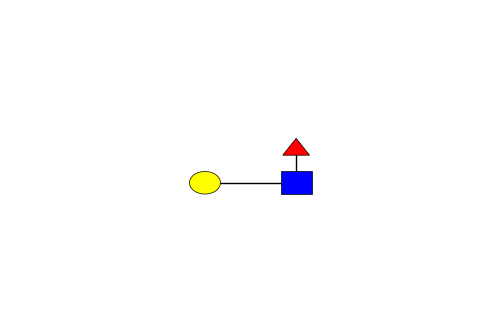

In [35]:
from glypy.plot import plot
%matplotlib inline
plot(glycoct.loads(glytoucan_data_base['G00047MO']["GlycoCT"]))
# plot(vim_motif)